In [1]:
#########################
##                     ##
## Irving Gomez Mendez ##
##  October 27, 2021   ##
##                     ##
#########################

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm, bernoulli

In [3]:
class confounder:
    def simula_Z(self, n, p):
        self.Z = bernoulli.rvs(p = p, size = 2*n)
        self.n = n

    def simula_datos(self, seed):
        np.random.seed(seed = seed)

        n1 = self.Z.sum()
        n0 = 2*self.n - n1

        x0 = norm.rvs(5, 1, n0)
        y0 = norm.rvs(4, 1, n0)

        x1 = norm.rvs(6, 1, n1)
        y1 = norm.rvs(6, 1, n1)

        dat0 = pd.DataFrame({'X': x0, 'Y': y0, 'Z': 0})
        dat1 = pd.DataFrame({'X': x1, 'Y': y1, 'Z': 1})

        self.datos = pd.concat([dat0, dat1]).reset_index(drop = True)

    def grafica_datos(self, dado_Z = False):
        if dado_Z:
            sns.lmplot(data = self.datos, x = 'X', y = 'Y', hue = 'Z', height = 7.5)
        else:
            plt.figure(figsize = (10,7.5))
            sns.regplot(data = self.datos, x = 'X', y = 'Y')

    def main(self, n, seed = 159, p = 0.5):
        self.simula_Z(n, p)
        self.simula_datos(seed)
        self.grafica_datos()
        #plt.savefig('confounder_1.png', transparent=True)
        self.grafica_datos(dado_Z = True)
        #plt.savefig('confounder_2.png', transparent=True)

In [4]:
class collider:
    def simula_datos(self, n, seed):
        np.random.seed(seed = seed)

        x = norm.rvs(5, 1, n)
        y = norm.rvs(5, 1, n)

        datos = pd.DataFrame({'X': x, 'Y': y})

        x0 = np.array([5, 5])
        x0 = x0.reshape(2, 1)

        Z = (datos @ x0 > 50).astype(int)
        datos['Z'] = Z

        self.datos = datos

    def grafica_datos(self, dado_Z = False):
        if dado_Z:
            sns.lmplot(data = self.datos, x = 'X', y = 'Y', hue = 'Z', height = 7.5)
        else:
            plt.figure(figsize = (10,7.5))
            sns.regplot(data = self.datos, x = 'X', y = 'Y')

    def main(self, n, seed = 111):
        self.simula_datos(n, seed = seed)
        self.grafica_datos()
        #plt.savefig('collider_1.png', transparent=True)
        self.grafica_datos(dado_Z = True)
        #plt.savefig('collider_2.png', transparent=True)

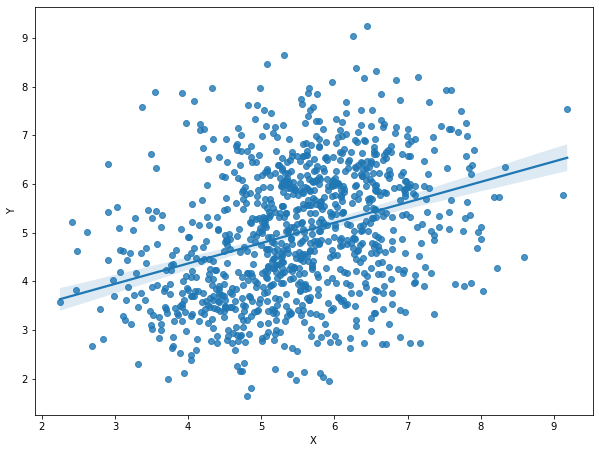

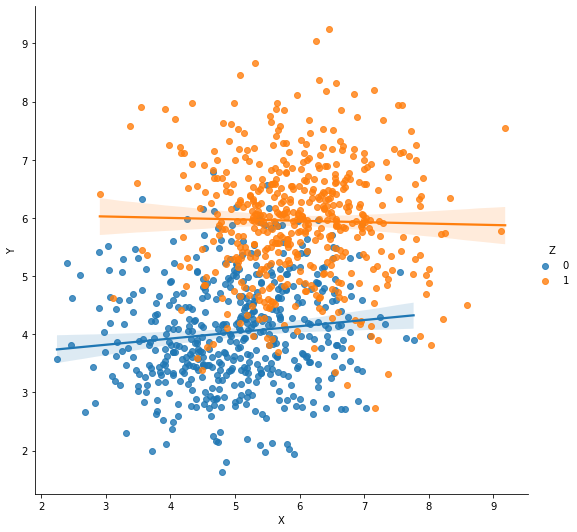

In [5]:
example_confounder = confounder()
example_confounder.main(n = 500)

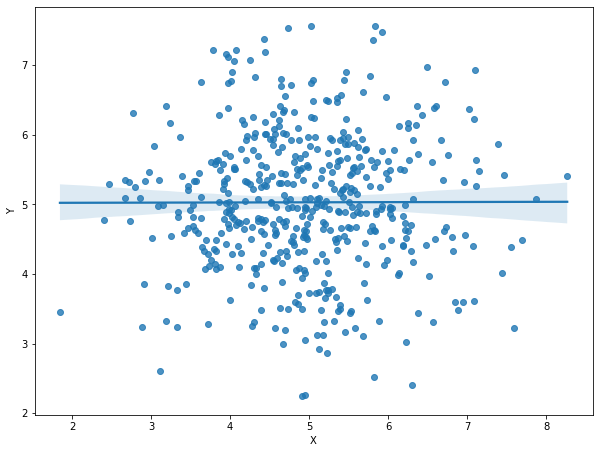

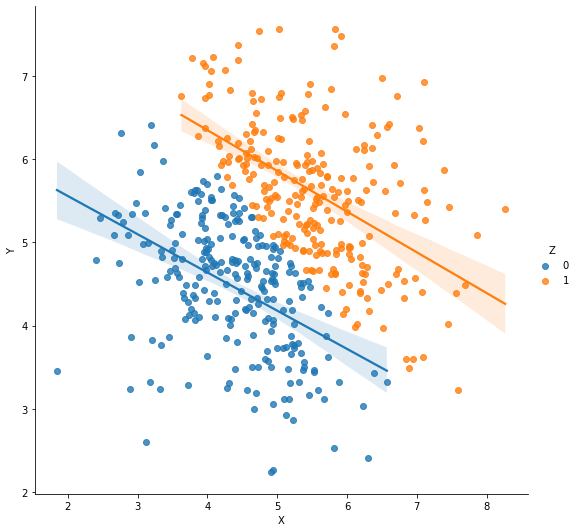

In [6]:
example_collider = collider()
example_collider.main(n = 500, seed = 111)